In [11]:
#loading packages
library(tidyverse)
library(data.table)
library(reshape2)
library(reshape)
library(ggplot2)
library(RColorBrewer)
library(vegan)
library(phyloseq)
library(dplyr) 
library(ggpubr)
library(Hmisc)
library(corrplot)
library(scales)
library(broom)
library(ecodist)

In [37]:
#loading files
ReadCounts_TaxAnnotation <- read.delim("output_16s_refseq/ReadCounts_TaxAnnotation.txt", header = TRUE)
metadata <- read.delim("/media/zaramela/dumbo/vania/metadata_nreads.tsv", h=T)

##### Phylum

In [90]:
#parameters to set before running
#choose taxonomic
df <- aggregate(ReadCounts_TaxAnnotation$Counts, list(ReadCounts_TaxAnnotation$Phylum, ReadCounts_TaxAnnotation$ID_Sample), FUN=sum) 
colnames(df) <- c("Taxa", "ID_Sample", "Counts")
cast_data = acast(df, ID_Sample ~ Taxa)
cast_data[is.na(cast_data)] <- 0

# Creating the relative abundance data.frame
tcast_data <- t(cast_data)
relative_abundance <- (t(tcast_data) / apply(tcast_data, 2, sum))*100
df_relab <- melt(relative_abundance)
colnames(df_relab) <- c("ID_Sample", "Taxa", "RelativeAbundance")
df_relab <- df_relab[-which(df_relab$RelativeAbundance == 0),]
df_relabmeta <- merge(df_relab, metadata, by = "ID_Sample")

Using Counts as value column: use value.var to override.

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


In [91]:
options(repr.plot.width=15, repr.plot.height=8)

group <- c("LFD", "LFD + OVA", "HFD", "HFD + OVA")

df_relabmeta$ExperimentalGroup <- factor(df_relabmeta$ExperimentalGroup,
                                  levels = group, ordered = TRUE)

colourCount = length(unique(df_relabmeta$Taxa)) + 10
getPalette = colorRampPalette(brewer.pal(8, "Set1"))

phylum <- ggplot(data = df_relabmeta, aes(x=ID_Sample, y=RelativeAbundance, fill=Taxa)) + 
                 geom_bar(stat="identity", width=1, position="stack") +
                 facet_grid(~ ExperimentalGroup, scales = "free", space = "free") +
                 scale_fill_manual(values=getPalette(colourCount)) +
                 labs(x = "", y = "Relative Abundance %") +
                 theme_bw() + guides(fill=guide_legend(ncol=2))  +
                 theme(#panel.border = element_rect(colour = "black", fill=NA, size=1),
                       #axis.text.x = element_text(angle = 90, size = 6, face = "bold", colour = "black"),
                       axis.title.x=element_blank(),
                       axis.text.x=element_blank(),
                       axis.ticks.x=element_blank(),
                       axis.text.y = element_text(angle = 0, size = 16, face = "bold", colour = "black"),
                       axis.title=element_text(size=20, face = "bold", colour = "black"),
                       strip.text.x = element_text(size = 16, face = "bold", colour = "black"),
                       strip.background = element_rect(fill="white"),
                       legend.title=element_blank(), 
                       legend.text=element_text(size=12, face = "bold"))

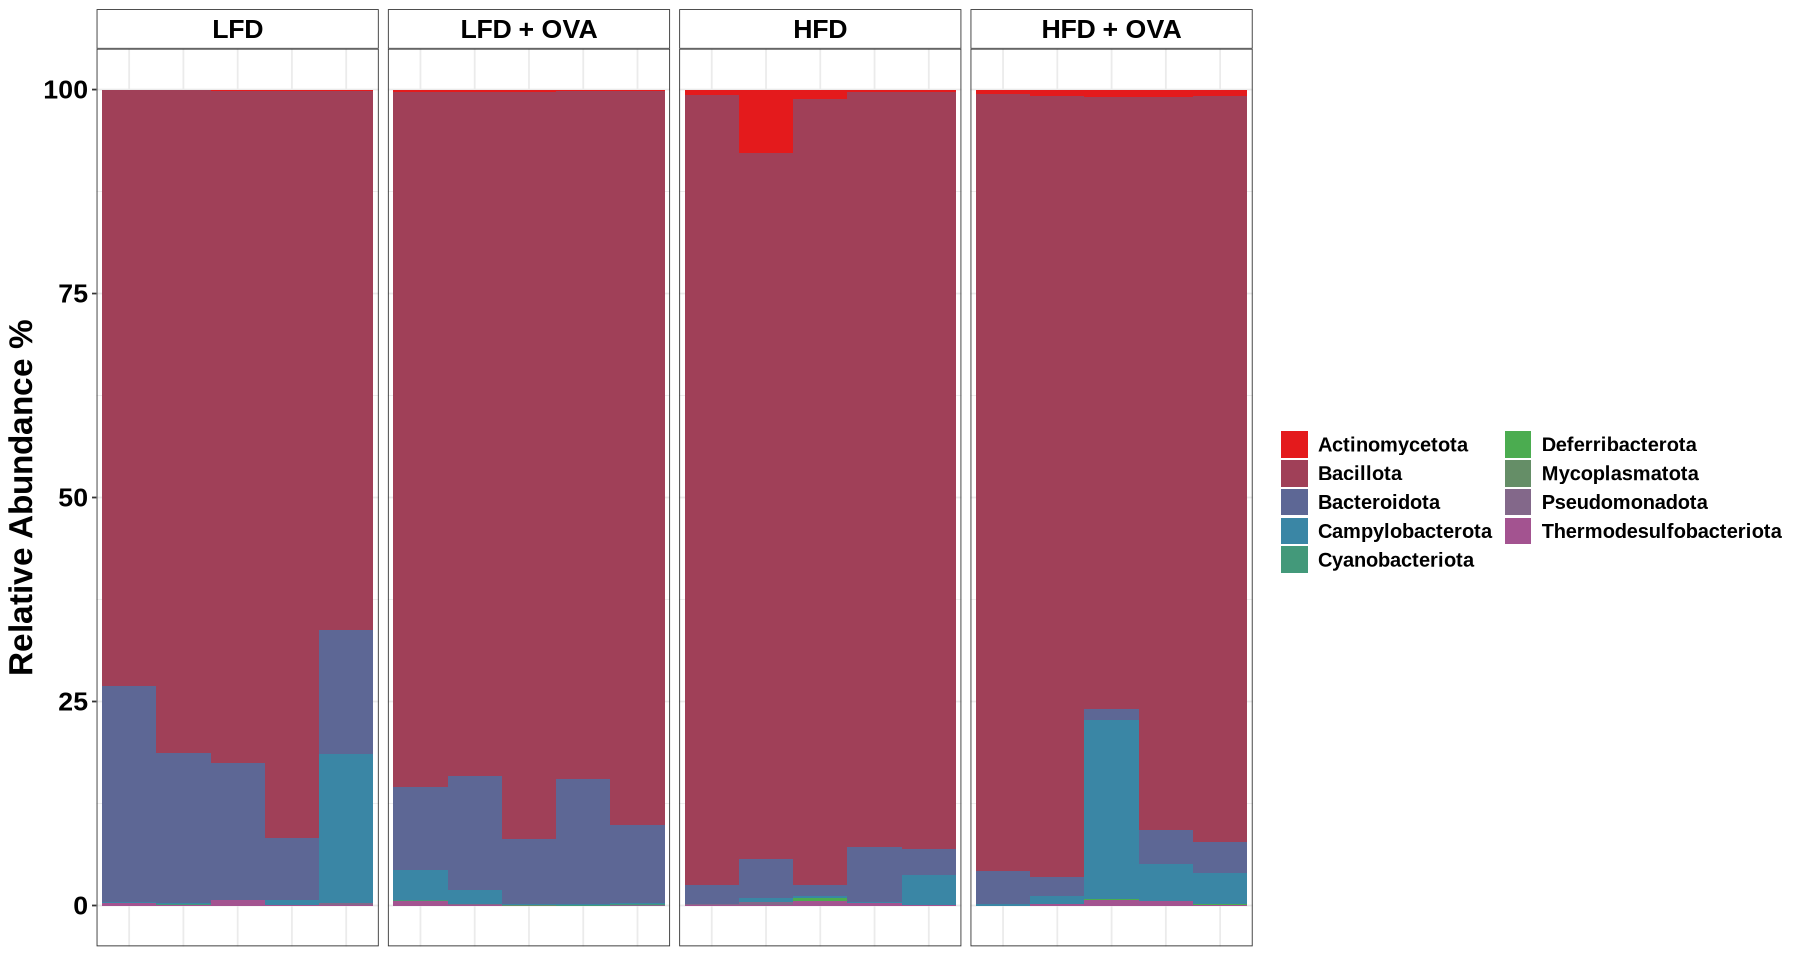

In [92]:
print(phylum)

##### Family

In [ ]:
#parameters to set before running
#choose taxonomic
df <- aggregate(ReadCounts_TaxAnnotation$Counts, list(ReadCounts_TaxAnnotation$Family, ReadCounts_TaxAnnotation$ID_Sample), FUN=sum) 
colnames(df) <- c("Taxa", "ID_Sample", "Counts")
cast_data = acast(df, ID_Sample ~ Taxa)
cast_data[is.na(cast_data)] <- 0

# Creating the relative abundance data.frame
tcast_data <- t(cast_data)
relative_abundance <- (t(tcast_data) / apply(tcast_data, 2, sum))*100
df_relab <- melt(relative_abundance)
colnames(df_relab) <- c("ID_Sample", "Taxa", "RelativeAbundance")
df_relab <- df_relab[-which(df_relab$RelativeAbundance == 0),]
df_relabmeta <- merge(df_relab, metadata, by = "ID_Sample")

In [89]:
options(repr.plot.width=15, repr.plot.height=8)

group <- c("LFD", "LFD + OVA", "HFD", "HFD + OVA")

df_relabmeta$ExperimentalGroup <- factor(df_relabmeta$ExperimentalGroup,
                                  levels = group, ordered = TRUE)

colourCount = length(unique(df_relabmeta$Taxa)) + 10
getPalette = colorRampPalette(brewer.pal(8, "Set1"))

family <- ggplot(data = df_relabmeta, aes(x=ID_Sample, y=RelativeAbundance, fill=Taxa)) + 
                 geom_bar(stat="identity", width=1, position="stack") +
                 facet_grid(~ ExperimentalGroup, scales = "free", space = "free") +
                 scale_fill_manual(values=getPalette(colourCount)) +
                 labs(x = "", y = "Relative Abundance %") +
                 theme_bw() + guides(fill=guide_legend(ncol=2))  +
                 theme(#panel.border = element_rect(colour = "black", fill=NA, size=1),
                       #axis.text.x = element_text(angle = 90, size = 6, face = "bold", colour = "black"),
                       axis.title.x=element_blank(),
                       axis.text.x=element_blank(),
                       axis.ticks.x=element_blank(),
                       axis.text.y = element_text(angle = 0, size = 16, face = "bold", colour = "black"),
                       axis.title=element_text(size=20, face = "bold", colour = "black"),
                       strip.text.x = element_text(size = 16, face = "bold", colour = "black"),
                       strip.background = element_rect(fill="white"),
                       legend.title=element_blank(), 
                       legend.text=element_text(size=12, face = "bold"))

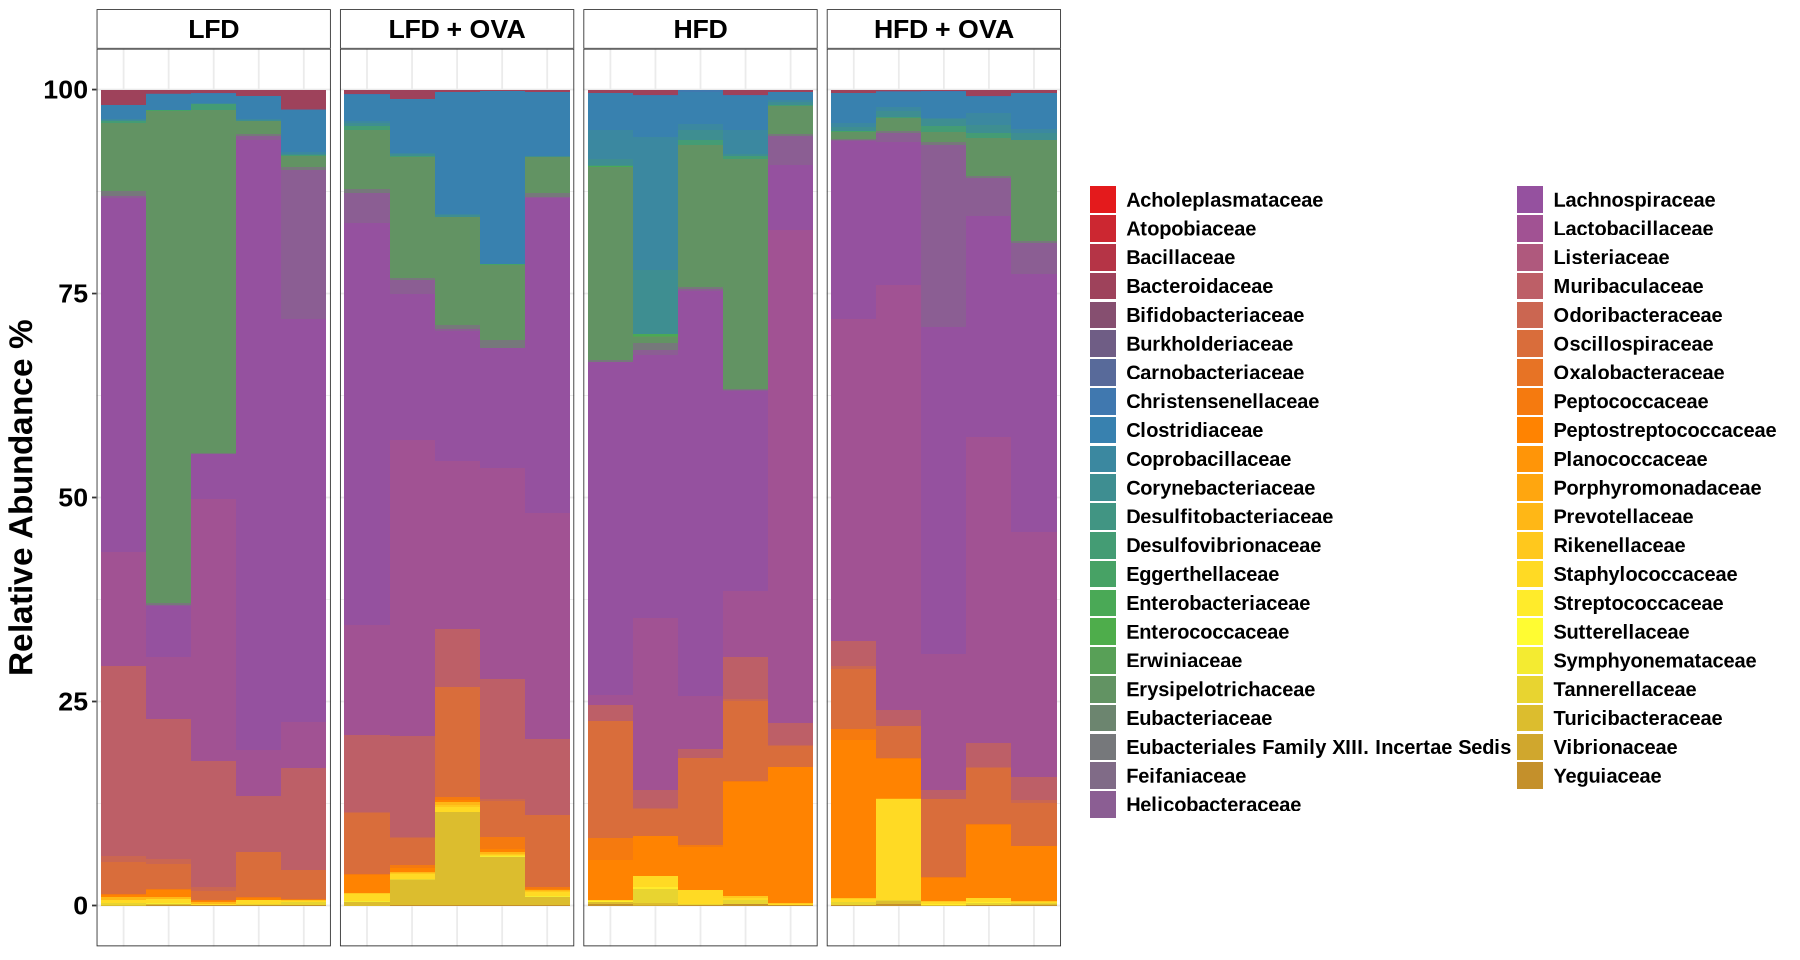

In [93]:
print(family)